<a href="https://colab.research.google.com/github/hungvo2003vn/Computer-Vision/blob/Ass1/Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết nối với drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [3]:
# Set the new working directory
YOUR_PROJECT_LOCATION = '/content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1'
os.chdir(YOUR_PROJECT_LOCATION)

# Verify the change
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1


In [6]:
# Chọn ảnh
picture_name = 'Cat1.jpg'
image_source = os.getcwd() + '/Images/' + picture_name
# Verify ảnh
print("Path ảnh đã chọn: ", image_source)

Path ảnh đã chọn:  /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1/Images/Cat1.jpg


In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
# Đọc ảnh màu
image_color = cv2.imread(image_source)

In [9]:
# Chuyển đổi sang ảnh xám
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

In [12]:
# Chuyển đổi ảnh xám thành ảnh màu
# Chuyển đổi ảnh xám sang ảnh màu sử dụng không gian màu Lab
image_color_from_gray = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
image_color_from_gray[:, :, 1] = 128  # Thiết lập kênh màu a
image_color_from_gray[:, :, 2] = 128  # Thiết lập kênh màu b
image_color_from_gray = cv2.cvtColor(image_color_from_gray, cv2.COLOR_BGR2Lab)

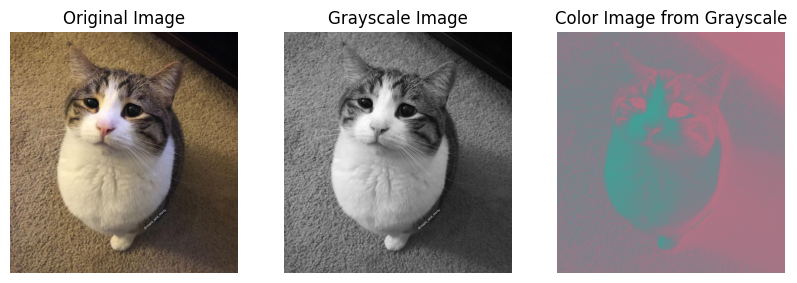

In [13]:
# Hiển thị ảnh gốc, ảnh xám và ảnh màu từ ảnh xám
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_color_from_gray, cv2.COLOR_BGR2RGB))
plt.title('Color Image from Grayscale')
plt.axis('off')

plt.show()